In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/bootcamp/Averiguacao Cadastral/Dados

/content/drive/MyDrive/bootcamp/Averiguacao Cadastral/Dados


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
# Load the datasets
df_familia_pessoas_final = pd.read_csv('df_familia_pessoas_final.csv',nrows=100000)


In [6]:
#Checando os valores únicos das colunas
# Definindo as colunas a serem analisadas
columns_to_check = ['cd_ibge', 'uf_ibge', 'regiao_ibge', 'estrato', 'classf', 'id_familia',
       'vlr_renda_media_fam', 'cod_local_domic_fam', 'cod_especie_domic_fam',
       'qtd_comodos_domic_fam', 'qtd_comodos_dormitorio_fam',
       'cod_material_piso_fam', 'cod_material_domic_fam',
       'cod_agua_canalizada_fam', 'cod_abaste_agua_domic_fam',
       'cod_banheiro_domic_fam', 'cod_escoa_sanitario_domic_fam',
       'cod_destino_lixo_domic_fam', 'cod_iluminacao_domic_fam',
       'cod_calcamento_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'peso.fam', 'dias_cadastramento', 'dias_atualizacao', 'classe_renda',
       'id_pessoa', 'cod_sexo_pessoa', 'idade', 'cod_parentesco_rf_pessoa',
       'cod_raca_cor_pessoa', 'cod_local_nascimento_pessoa',
       'cod_certidao_registrada_pessoa', 'cod_deficiencia_memb',
       'cod_sabe_ler_escrever_memb', 'ind_frequenta_escola_memb',
       'cod_escola_local_memb', 'cod_curso_frequenta_memb',
       'cod_ano_serie_frequenta_memb', 'cod_curso_frequentou_pessoa_memb',
       'cod_ano_serie_frequentou_memb', 'cod_concluiu_frequentou_memb',
       'cod_trabalhou_memb', 'cod_afastado_trab_memb',
       'cod_agricultura_trab_memb', 'cod_principal_trab_memb',
       'cod_trabalho_12_meses_memb', 'qtd_meses_12_meses_memb', 'peso.pes',
       'qtd_pessoas', 'infancia', 'crianca_adolescente', 'adultos', 'idoso',
       'deficiencia', 'alfabetizado', 'frequenta_escola',
       'frequenta_escola_publica', 'frequenta_escola_nunca',
       'frequenta_escola_privada', 'frequenta_escola_nunca_adulto',
       'trabalho_semana_adulto', 'trabalho_semana_idoso',
       'trabalho_semana_criança', 'afastado_trabalho', 'trabalho_principal',
       'trabalho_12meses_adulto', 'trabalho_12meses_idoso',
       'trabalho_12meses_criança', 'meses_trabalho']
# Criando um dicionário para armazenar os tipos de resposta
response_types = {}

# Iterando sobre as colunas e coletando os valores únicos
for column in columns_to_check:
    response_types[column] = df_familia_pessoas_final[column].unique()

# Exibindo os tipos de resposta de cada coluna
for column, unique_values in response_types.items():
    print(f"Coluna: {column}\nValores únicos: {unique_values}\n")

Coluna: cd_ibge
Valores únicos: [4212908 2931905 3527207 ... 4111902 5106109 1507151]

Coluna: uf_ibge
Valores únicos: [42 29 35 33 28 21 13 41 26 50 17 15 32 22 23 31 43 12 25 24 52 11 27 51
 16 14 53]

Coluna: regiao_ibge
Valores únicos: [4 2 3 1 5]

Coluna: estrato
Valores únicos: [1 2]

Coluna: classf
Valores únicos: [2 3 1]

Coluna: id_familia
Valores únicos: [ 268503 2888440 2113517 ... 2504401 3922663 2516529]

Coluna: vlr_renda_media_fam
Valores únicos: [  60.    0.  713. ... 1046. 1593. 2074.]

Coluna: cod_local_domic_fam
Valores únicos: [1. 2. 9.]

Coluna: cod_especie_domic_fam
Valores únicos: [1. 2. 3. 9.]

Coluna: qtd_comodos_domic_fam
Valores únicos: [ 5.  2.  3.  4. -1.  8.  6.  7.  9.  1. 10. 11. 12. 13. 15. 14. 16.  0.]

Coluna: qtd_comodos_dormitorio_fam
Valores únicos: [ 2.  1. -1.  3.  4.  5.  0.  6. 15.  7. 11. 10. 12. 20.  8.  9.]

Coluna: cod_material_piso_fam
Valores únicos: [ 5.  2. -1.  4.  1.  3.  7.  6.]

Coluna: cod_material_domic_fam
Valores únicos: [ 1.  2

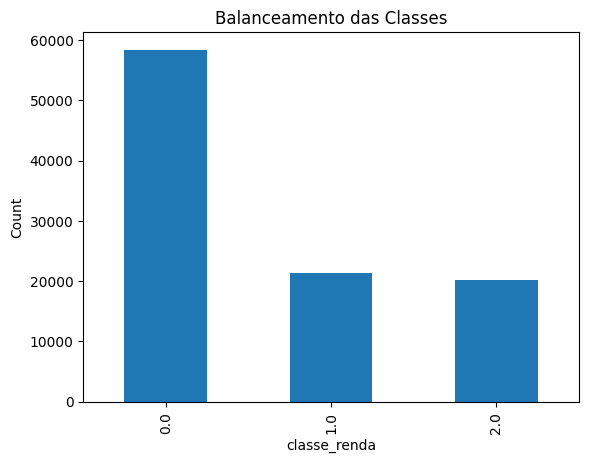

In [7]:
# Gráfico de barras para verificar balanceamento das classes considerando as pessoas
df_familia_pessoas_final['classe_renda'].value_counts().plot(kind='bar')
plt.xlabel('classe_renda')
plt.ylabel('Count')
plt.title('Balanceamento das Classes')
plt.show()

In [8]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_familia_pessoas_final[['cd_ibge', 'uf_ibge', 'regiao_ibge', 'estrato', 'classf', 'id_familia',
       'vlr_renda_media_fam', 'cod_local_domic_fam', 'cod_especie_domic_fam',
       'qtd_comodos_domic_fam', 'qtd_comodos_dormitorio_fam',
       'cod_material_piso_fam', 'cod_material_domic_fam',
       'cod_agua_canalizada_fam', 'cod_abaste_agua_domic_fam',
       'cod_banheiro_domic_fam', 'cod_escoa_sanitario_domic_fam',
       'cod_destino_lixo_domic_fam', 'cod_iluminacao_domic_fam',
       'cod_calcamento_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'peso.fam', 'dias_cadastramento', 'dias_atualizacao', 'classe_renda',
       'id_pessoa', 'cod_sexo_pessoa', 'idade', 'cod_parentesco_rf_pessoa',
       'cod_raca_cor_pessoa', 'cod_local_nascimento_pessoa',
       'cod_certidao_registrada_pessoa', 'cod_deficiencia_memb',
       'cod_sabe_ler_escrever_memb', 'ind_frequenta_escola_memb',
       'cod_escola_local_memb', 'cod_curso_frequenta_memb',
       'cod_ano_serie_frequenta_memb', 'cod_curso_frequentou_pessoa_memb',
       'cod_ano_serie_frequentou_memb', 'cod_concluiu_frequentou_memb',
       'cod_trabalhou_memb', 'cod_afastado_trab_memb',
       'cod_agricultura_trab_memb', 'cod_principal_trab_memb',
       'cod_trabalho_12_meses_memb', 'qtd_meses_12_meses_memb', 'peso.pes',
       'qtd_pessoas', 'infancia', 'crianca_adolescente', 'adultos', 'idoso',
       'deficiencia', 'alfabetizado', 'frequenta_escola',
       'frequenta_escola_publica', 'frequenta_escola_nunca',
       'frequenta_escola_privada', 'frequenta_escola_nunca_adulto',
       'trabalho_semana_adulto', 'trabalho_semana_idoso',
       'trabalho_semana_criança', 'afastado_trabalho', 'trabalho_principal',
       'trabalho_12meses_adulto', 'trabalho_12meses_idoso',
       'trabalho_12meses_criança', 'meses_trabalho']]

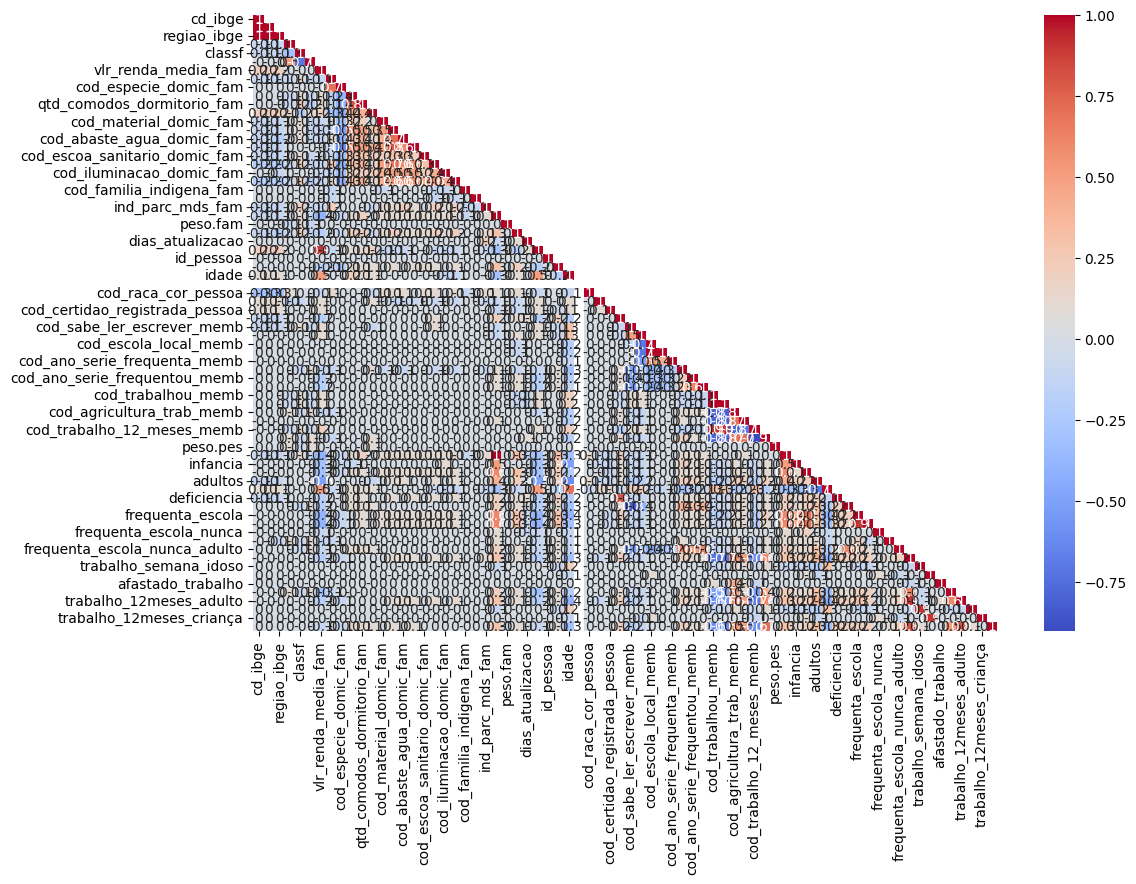

In [9]:
# Cria mask para não mostrar valores acima da diagonal
mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(12,8))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [10]:
# Selecionar apenas as colunas numéricas
numeric_cols = df_features.select_dtypes(include=np.number).columns

# Calcular a matriz de correlação
corr_matrix = df_features[numeric_cols].corr()

# Encontrar as correlações com valor absoluto maior que 0.8
corr_strong = corr_matrix[abs(corr_matrix) > 0.8]

# Imprimir as correlações fortes
for col in corr_strong.columns:
    for row in corr_strong.index:
        if col != row and corr_strong.loc[row, col] > 0.8:
            print(f"Correlação forte entre {row} e {col}: {corr_strong.loc[row, col]}")

Correlação forte entre uf_ibge e cd_ibge: 0.9998609645736085
Correlação forte entre regiao_ibge e cd_ibge: 0.9690647193544581
Correlação forte entre cd_ibge e uf_ibge: 0.9998609645736085
Correlação forte entre regiao_ibge e uf_ibge: 0.9696309574060954
Correlação forte entre cd_ibge e regiao_ibge: 0.9690647193544581
Correlação forte entre uf_ibge e regiao_ibge: 0.9696309574060954
Correlação forte entre classe_renda e vlr_renda_media_fam: 0.9124832170971457
Correlação forte entre qtd_comodos_dormitorio_fam e qtd_comodos_domic_fam: 0.8126299182697168
Correlação forte entre qtd_comodos_domic_fam e qtd_comodos_dormitorio_fam: 0.8126299182697168
Correlação forte entre cod_banheiro_domic_fam e cod_agua_canalizada_fam: 0.8342429800984622
Correlação forte entre cod_agua_canalizada_fam e cod_banheiro_domic_fam: 0.8342429800984622
Correlação forte entre qtd_pessoas e qtde_pessoas: 1.0
Correlação forte entre vlr_renda_media_fam e classe_renda: 0.9124832170971457
Correlação forte entre cod_curso_fr

In [11]:
#Retirando features com correlação > 8
df_features = df_features.drop(columns=['cd_ibge', 'regiao_ibge', 'vlr_renda_media_fam','qtd_comodos_dormitorio_fam',
          'cod_banheiro_domic_fam', 'qtde_pessoas','cod_escola_local_memb','cod_trabalhou_memb','cod_trabalho_12_meses_memb',
          'frequenta_escola','trabalho_12meses_adulto','trabalho_12meses_idoso','trabalho_12meses_criança'])


In [12]:
# Selecionar apenas as colunas numéricas
numeric_cols = df_features.select_dtypes(include=np.number).columns

# Calcular a matriz de correlação
corr_matrix = df_features[numeric_cols].corr()

# Encontrar as correlações com valor absoluto maior que 0.8
corr_strong = corr_matrix[abs(corr_matrix) > 0.8]

# Imprimir as correlações fortes
for col in corr_strong.columns:
    for row in corr_strong.index:
        if col != row and corr_strong.loc[row, col] > 0.8:
            print(f"Correlação forte entre {row} e {col}: {corr_strong.loc[row, col]}")

# Seleção das variáveis independentes (Features)

In [13]:
 df_features.columns

Index(['uf_ibge', 'estrato', 'classf', 'id_familia', 'cod_local_domic_fam',
       'cod_especie_domic_fam', 'qtd_comodos_domic_fam',
       'cod_material_piso_fam', 'cod_material_domic_fam',
       'cod_agua_canalizada_fam', 'cod_abaste_agua_domic_fam',
       'cod_escoa_sanitario_domic_fam', 'cod_destino_lixo_domic_fam',
       'cod_iluminacao_domic_fam', 'cod_calcamento_domic_fam',
       'cod_familia_indigena_fam', 'ind_familia_quilombola_fam',
       'ind_parc_mds_fam', 'peso.fam', 'dias_cadastramento',
       'dias_atualizacao', 'classe_renda', 'id_pessoa', 'cod_sexo_pessoa',
       'idade', 'cod_parentesco_rf_pessoa', 'cod_raca_cor_pessoa',
       'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_curso_frequenta_memb',
       'cod_ano_serie_frequenta_memb', 'cod_curso_frequentou_pessoa_memb',
       'cod_ano_serie_frequentou_memb', 'cod_concluiu_frequentou_memb',
 

In [14]:
# Selecionando as variáveis que serão utilizadas para o modelo
X = df_familia_pessoas_final [['uf_ibge', 'estrato', 'classf', 'id_familia', 'cod_local_domic_fam',
       'cod_especie_domic_fam', 'qtd_comodos_domic_fam',
       'cod_material_piso_fam', 'cod_material_domic_fam',
       'cod_agua_canalizada_fam', 'cod_abaste_agua_domic_fam',
       'cod_escoa_sanitario_domic_fam', 'cod_destino_lixo_domic_fam',
       'cod_iluminacao_domic_fam', 'cod_calcamento_domic_fam',
       'cod_familia_indigena_fam', 'ind_familia_quilombola_fam',
       'ind_parc_mds_fam', 'peso.fam', 'dias_cadastramento',
       'dias_atualizacao', 'id_pessoa', 'cod_sexo_pessoa',
       'idade', 'cod_parentesco_rf_pessoa', 'cod_raca_cor_pessoa',
       'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_curso_frequenta_memb',
       'cod_ano_serie_frequenta_memb', 'cod_curso_frequentou_pessoa_memb',
       'cod_ano_serie_frequentou_memb', 'cod_concluiu_frequentou_memb',
       'cod_afastado_trab_memb', 'cod_agricultura_trab_memb',
       'cod_principal_trab_memb', 'qtd_meses_12_meses_memb', 'peso.pes',
       'qtd_pessoas', 'infancia', 'crianca_adolescente', 'adultos', 'idoso',
       'deficiencia', 'alfabetizado', 'frequenta_escola_publica',
       'frequenta_escola_nunca', 'frequenta_escola_privada',
       'frequenta_escola_nunca_adulto', 'trabalho_semana_adulto',
       'trabalho_semana_idoso', 'trabalho_semana_criança', 'afastado_trabalho',
       'trabalho_principal', 'meses_trabalho']]

y = df_familia_pessoas_final['classe_renda']

# Exibindo as informações de X
print('X =', X.shape)
X.head()

X = (100000, 58)


,uf_ibge,estrato,classf,id_familia,cod_local_domic_fam,cod_especie_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_material_domic_fam,cod_agua_canalizada_fam,...,frequenta_escola_publica,frequenta_escola_nunca,frequenta_escola_privada,frequenta_escola_nunca_adulto,trabalho_semana_adulto,trabalho_semana_idoso,trabalho_semana_criança,afastado_trabalho,trabalho_principal,meses_trabalho
0,42,1,2,268503,1.0,1.0,5.0,5.0,1.0,1.0,...,1,0,0,1,1,0,0,0,0,12.0
1,29,2,3,2888440,2.0,1.0,2.0,2.0,2.0,2.0,...,1,0,0,1,0,0,0,0,0,0.0
2,35,2,3,2113517,1.0,1.0,5.0,5.0,1.0,1.0,...,0,0,0,1,1,0,0,0,1,12.0
3,33,2,2,4419096,1.0,1.0,3.0,5.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,0.0
4,28,2,1,4241219,1.0,1.0,4.0,5.0,2.0,1.0,...,0,0,0,1,0,0,0,0,0,-1.0


In [15]:
y.head()

,classe_renda
0,0.0
1,0.0
2,2.0
3,0.0
4,0.0


In [16]:
X.columns

Index(['uf_ibge', 'estrato', 'classf', 'id_familia', 'cod_local_domic_fam',
       'cod_especie_domic_fam', 'qtd_comodos_domic_fam',
       'cod_material_piso_fam', 'cod_material_domic_fam',
       'cod_agua_canalizada_fam', 'cod_abaste_agua_domic_fam',
       'cod_escoa_sanitario_domic_fam', 'cod_destino_lixo_domic_fam',
       'cod_iluminacao_domic_fam', 'cod_calcamento_domic_fam',
       'cod_familia_indigena_fam', 'ind_familia_quilombola_fam',
       'ind_parc_mds_fam', 'peso.fam', 'dias_cadastramento',
       'dias_atualizacao', 'id_pessoa', 'cod_sexo_pessoa', 'idade',
       'cod_parentesco_rf_pessoa', 'cod_raca_cor_pessoa',
       'cod_local_nascimento_pessoa', 'cod_certidao_registrada_pessoa',
       'cod_deficiencia_memb', 'cod_sabe_ler_escrever_memb',
       'ind_frequenta_escola_memb', 'cod_curso_frequenta_memb',
       'cod_ano_serie_frequenta_memb', 'cod_curso_frequentou_pessoa_memb',
       'cod_ano_serie_frequentou_memb', 'cod_concluiu_frequentou_memb',
       'cod_afast

In [17]:
#import pandas as pd
#from sklearn.compose import make_column_transformer
#from sklearn.preprocessing import OneHotEncoder

In [18]:
#col_transf = make_column_transformer((OneHotEncoder(), ['regiao_ibge', 'estrato', 'classf', 'cod_local_domic_fam', 'cod_especie_domic_fam', 'cod_agua_canalizada_fam',
 #   'cod_abaste_agua_domic_fam', 'cod_banheiro_domic_fam', 'cod_escoa_sanitario_domic_fam', 'cod_destino_lixo_domic_fam', 'cod_iluminacao_domic_fam', 'cod_calcamento_domic_fam',
#  'cod_familia_indigena_fam', 'ind_familia_quilombola_fam']),
  #                                   remainder='passthrough')

In [19]:
#col_transf.fit_transform(X)

In [20]:
#col_transf.get_feature_names_out()

In [21]:
# Realizar a transformação e criar um DataFrame temporário com as colunas transformadas
#transformed_data = col_transf.fit_transform(X)
#transformed_columns = col_transf.get_feature_names_out()
#df_transformed = pd.DataFrame(transformed_data, columns=transformed_columns, index=X.index)

# Substituir as colunas de X pelas colunas transformadas
#X = df_transformed

In [22]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Testando o modelo do tipo XGBClassifier

In [23]:
!pip install xgboost -q

In [24]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Mapeando as classes do target
y_train_mapped = y_train

# Criar pipeline com normalização e modelo XGBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(objective='multi:softmax', num_class=3, random_state=42))
])

# Definir hiperparâmetros para o Grid Search
param_grid = {
    'xgb__n_estimators': [250, 300, 350],
    'xgb__max_depth': [2, 3, 4],
    'xgb__learning_rate': [0.1]
}

# Grid Search com validação cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train_mapped)  # Usando y_train_mapped

# Melhor modelo encontrado
gb_best = grid_search.best_estimator_
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# F1 score no conjunto de teste
y_test_mapped = y_test
y_pred = gb_best.predict(X_test)
f1 = f1_score(y_test_mapped, y_pred, average='macro')  # Calcular F1 score para multiclasse
print(f"F1 Score: {f1:.2f}")

Melhores hiperparâmetros: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 4, 'xgb__n_estimators': 350}
F1 Score: 0.73


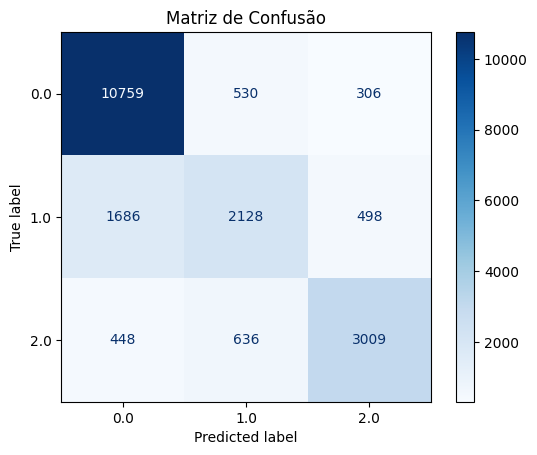

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Gerar e exibir a matriz de confusão diretamente a partir do estimador
ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, X_test, y_test, cmap='Blues')
# Personalizar o gráfico
plt.title('Matriz de Confusão')
plt.show()

In [26]:
from sklearn.inspection import permutation_importance

In [27]:
# 7- Importância das features por permutação
# Obter o melhor modelo treinado do GridSearchCV
best_model = grid_search.best_estimator_

In [28]:
# Calcular a importância das features por permutação
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

In [29]:
# Obter as importâncias médias e o desvio padrão das importâncias
importances_mean = perm_importance.importances_mean
importances_std = perm_importance.importances_std
features = X_test.columns

In [30]:
# Obter as importâncias médias e o desvio padrão das importâncias
importance_vals = perm_importance.importances_mean
importance_std = perm_importance.importances_std
features = X_test.columns

In [31]:
# Ordenar as importâncias em ordem decrescente
indices = np.argsort(importance_vals)[::-1]

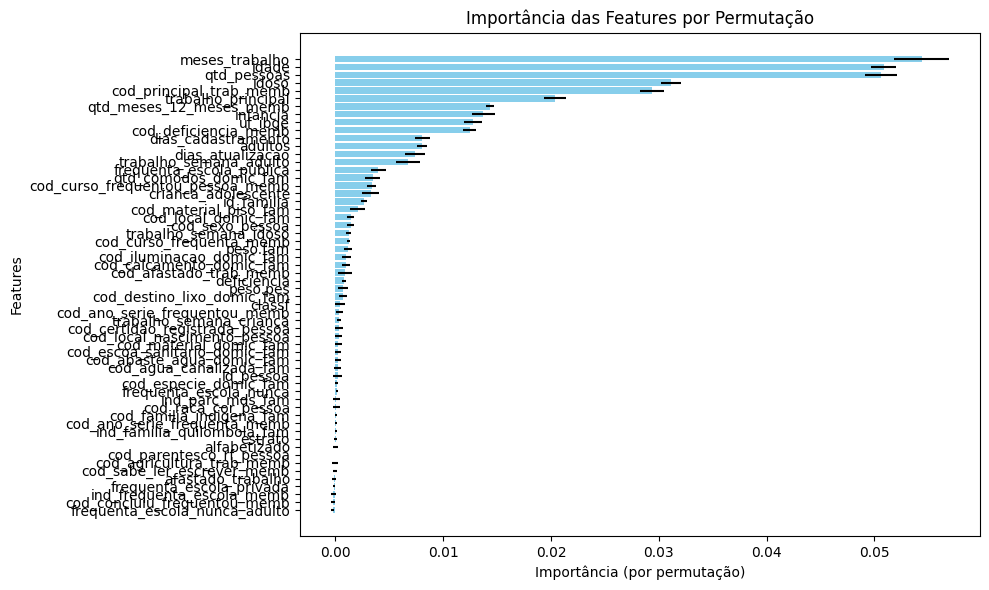

In [32]:
# Plotar a importância das features na horizontal com desvio padrão
plt.figure(figsize=(10, 6))
plt.title("Importância das Features por Permutação")
plt.barh(range(len(importance_vals)), importance_vals[indices], xerr=importance_std[indices], align="center", color='skyblue')
plt.yticks(range(len(importance_vals)), features[indices])
plt.gca().invert_yaxis()  # Inverter o eixo Y para que a feature mais importante fique no topo
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [33]:
# Criar uma lista de tuplas com a importância, desvio padrão e o nome da feature
feature_importance = list(zip(features, importance_vals, importance_std))

# Ordenar pela importância de forma decrescente
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Exibir a lista de importância das features
print("Importância das Features por Permutação:")
for feature, importance, std in feature_importance:
    print(f"Feature: {feature}, Importância: {importance:.4f}, Desvio Padrão: {std:.4f}")

Importância das Features por Permutação:
Feature: meses_trabalho, Importância: 0.0544, Desvio Padrão: 0.0025
Feature: idade, Importância: 0.0509, Desvio Padrão: 0.0011
Feature: qtd_pessoas, Importância: 0.0506, Desvio Padrão: 0.0015
Feature: idoso, Importância: 0.0311, Desvio Padrão: 0.0009
Feature: cod_principal_trab_memb, Importância: 0.0294, Desvio Padrão: 0.0011
Feature: trabalho_principal, Importância: 0.0204, Desvio Padrão: 0.0010
Feature: qtd_meses_12_meses_memb, Importância: 0.0143, Desvio Padrão: 0.0004
Feature: infancia, Importância: 0.0137, Desvio Padrão: 0.0011
Feature: uf_ibge, Importância: 0.0128, Desvio Padrão: 0.0008
Feature: cod_deficiencia_memb, Importância: 0.0125, Desvio Padrão: 0.0006
Feature: dias_cadastramento, Importância: 0.0081, Desvio Padrão: 0.0007
Feature: adultos, Importância: 0.0080, Desvio Padrão: 0.0005
Feature: dias_atualizacao, Importância: 0.0074, Desvio Padrão: 0.0009
Feature: trabalho_semana_adulto, Importância: 0.0067, Desvio Padrão: 0.0011
Featur

In [34]:
# 7. Criar um DataFrame com as importâncias
importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_importance.importances_mean
})

# 8. Filtrar as features com importância maior que zero
important_features = importance_df[importance_df['Importance'] > 0.001]

print("Features com importância maior que zero:")
print(important_features)

# 9. Selecionar apenas as colunas importantes no conjunto de dados
X_train_filtered = X_train[important_features['Feature']]
X_test_filtered = X_test[important_features['Feature']]

# Grid Search com validação cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_filtered, y_train)

# Melhor modelo encontrado
gb_best = grid_search.best_estimator_
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")
# F1 score
y_pred = gb_best.predict(X_test_filtered)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

Features com importância maior que zero:
                             Feature  Importance
0                            uf_ibge    0.012765
3                         id_familia    0.002655
4                cod_local_domic_fam    0.001420
6              qtd_comodos_domic_fam    0.003465
7              cod_material_piso_fam    0.002065
13          cod_iluminacao_domic_fam    0.001020
18                          peso.fam    0.001210
19                dias_cadastramento    0.008085
20                  dias_atualizacao    0.007395
22                   cod_sexo_pessoa    0.001415
23                             idade    0.050855
28              cod_deficiencia_memb    0.012455
31          cod_curso_frequenta_memb    0.001240
33  cod_curso_frequentou_pessoa_memb    0.003380
38           cod_principal_trab_memb    0.029395
39           qtd_meses_12_meses_memb    0.014325
41                       qtd_pessoas    0.050600
42                          infancia    0.013730
43               crianca_ado

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Melhores hiperparâmetros: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 2, 'xgb__n_estimators': 250}
F1 Score: 0.68


# Testando o modelo Árvore de decisão

In [35]:
# Importando as bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# Filtrar as features com importância maior que 0.001
important_features = importance_df[importance_df['Importance'] > 0.001]['Feature'].tolist()


In [37]:
# Selecionar apenas as important_features do df_pessoas_final_rf
X = df_familia_pessoas_final[important_features]
y = df_familia_pessoas_final['classe_renda']  # Variável target (supõe-se que seja 'classe_renda')

In [38]:
# Dividir os dados em treino e teste (70% treino e 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Criar e treinar o modelo de Árvore de Decisão
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=3)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [40]:
# Fazer previsões nos dados de teste
y_pred = decision_tree.predict(X_test)

In [41]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 0.7157

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.76      0.92      0.83     17438
         1.0       0.53      0.28      0.37      6468
         2.0       0.65      0.60      0.62      6094

    accuracy                           0.72     30000
   macro avg       0.65      0.60      0.61     30000
weighted avg       0.69      0.72      0.69     30000



In [42]:
# Importância das features utilizadas pelo modelo
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': decision_tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [43]:
print("\nImportância das Features no Modelo de Árvore de Decisão:")
print(feature_importances)


Importância das Features no Modelo de Árvore de Decisão:
                             Feature  Importance
20                             idoso    0.558017
14           cod_principal_trab_memb    0.169658
19                           adultos    0.094150
15           qtd_meses_12_meses_memb    0.066977
11              cod_deficiencia_memb    0.064329
10                             idade    0.036840
25                    meses_trabalho    0.010028
24                trabalho_principal    0.000000
23             trabalho_semana_idoso    0.000000
22            trabalho_semana_adulto    0.000000
21          frequenta_escola_publica    0.000000
18               crianca_adolescente    0.000000
17                          infancia    0.000000
16                       qtd_pessoas    0.000000
0                            uf_ibge    0.000000
1                         id_familia    0.000000
12          cod_curso_frequenta_memb    0.000000
9                    cod_sexo_pessoa    0.000000
8          

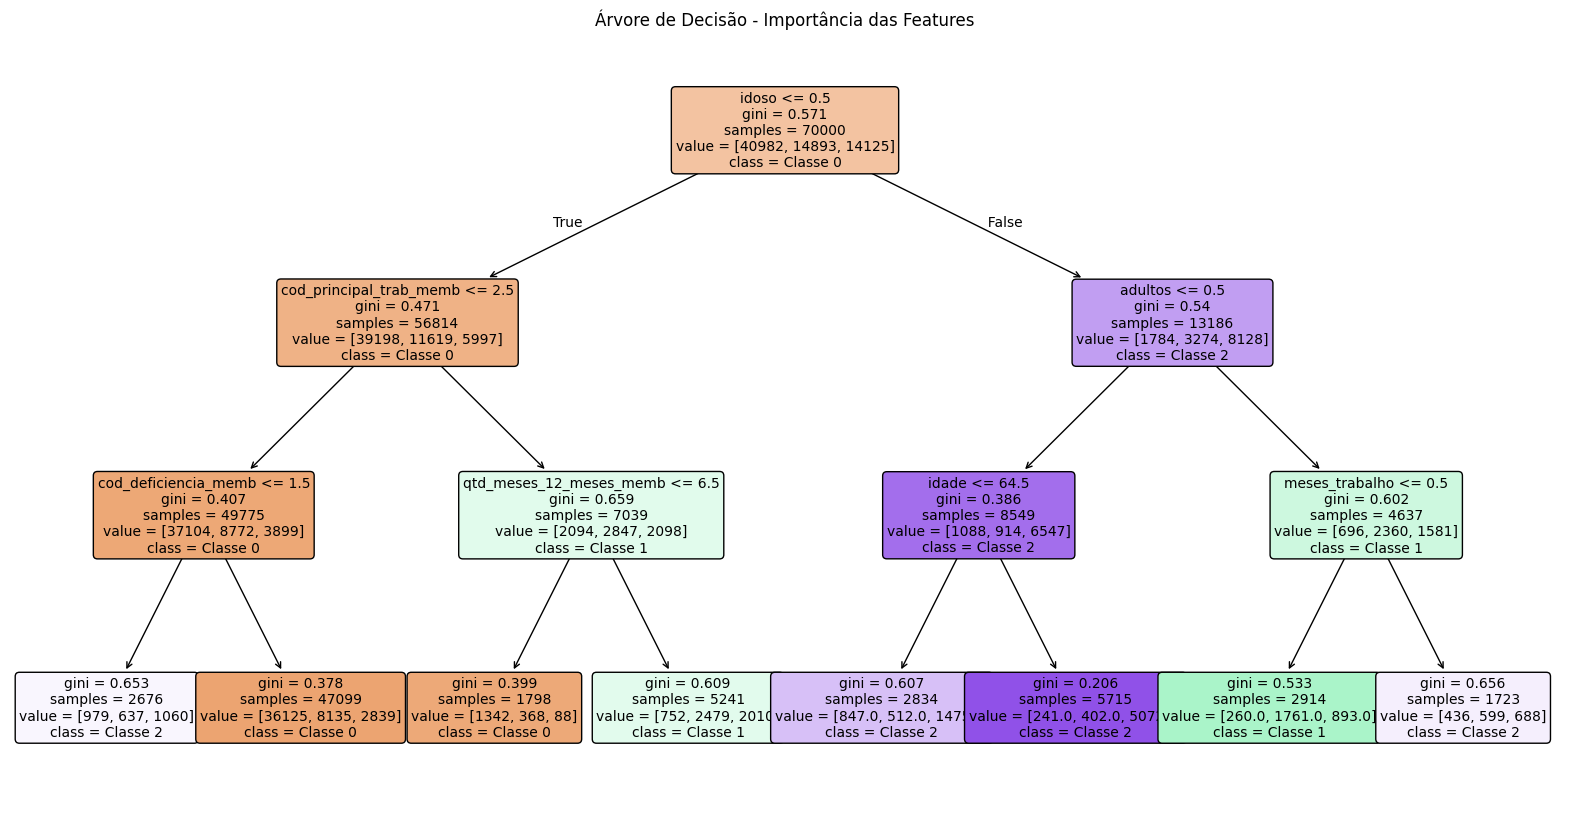

In [44]:
# Plotar a Árvore de Decisão
plt.figure(figsize=(20, 10))
plot_tree(
    decision_tree,
    feature_names=X.columns,
    class_names=['Classe 0', 'Classe 1', 'Classe 2'],  # Substitua pelos nomes das classes reais, se necessário
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árvore de Decisão - Importância das Features")
plt.show()

# Testando o modelo RandomForest

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Filtrar as features com importância maior que 0.001
important_features = importance_df[importance_df['Importance'] > 0.001]['Feature'].tolist()


In [47]:
# Selecionar apenas as important_features do df_pessoas_final_rf
X = df_familia_pessoas_final[important_features]
y = df_familia_pessoas_final['classe_renda']  # Variável target (supõe-se que seja 'classe_renda')

In [48]:
# Dividir os dados em treino e teste (70% treino e 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
# Criar e treinar o modelo Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, n_jobs=-1)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [50]:
# Fazer previsões nos dados de teste
y_pred = random_forest.predict(X_test)

In [51]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 0.7694

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86     17438
         1.0       0.64      0.38      0.48      6468
         2.0       0.79      0.69      0.74      6094

    accuracy                           0.77     30000
   macro avg       0.74      0.67      0.69     30000
weighted avg       0.76      0.77      0.75     30000



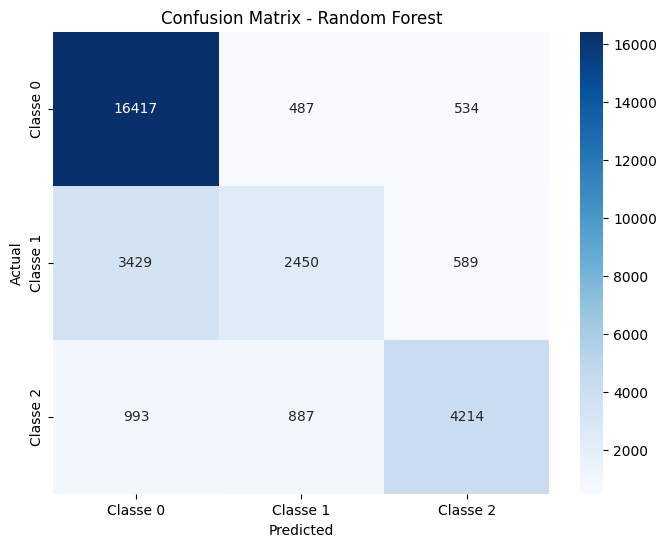

In [52]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1', 'Classe 2'],
            yticklabels=['Classe 0', 'Classe 1', 'Classe 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [53]:
# Importância das features utilizadas pelo modelo
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': random_forest.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [54]:
print("\nImportância das Features no Modelo Random Forest:")
print(feature_importances)


Importância das Features no Modelo Random Forest:
                             Feature  Importance
20                             idoso    0.152230
25                    meses_trabalho    0.129929
10                             idade    0.118282
19                           adultos    0.088371
14           cod_principal_trab_memb    0.087341
16                       qtd_pessoas    0.058000
17                          infancia    0.038458
15           qtd_meses_12_meses_memb    0.037301
7                 dias_cadastramento    0.035131
0                            uf_ibge    0.029847
21          frequenta_escola_publica    0.028273
24                trabalho_principal    0.027232
11              cod_deficiencia_memb    0.025907
4              cod_material_piso_fam    0.023962
18               crianca_adolescente    0.023545
8                   dias_atualizacao    0.017957
1                         id_familia    0.014059
13  cod_curso_frequentou_pessoa_memb    0.010562
3              qtd

# Testando o modelo CatBoost

In [55]:
!pip install catboost -q

In [56]:
# Importar bibliotecas necessárias
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [57]:
# Filtrar as features com importância maior que 0.001
important_features = importance_df[importance_df['Importance'] > 0.001]['Feature'].tolist()

In [58]:
# Selecionar apenas as important_features do df_pessoas_final_rf
X = df_familia_pessoas_final[important_features]
y = df_familia_pessoas_final['classe_renda']  # Variável target (supõe-se que seja 'classe_renda')

In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   uf_ibge                           100000 non-null  int64  
 1   id_familia                        100000 non-null  int64  
 2   cod_local_domic_fam               100000 non-null  float64
 3   qtd_comodos_domic_fam             100000 non-null  float64
 4   cod_material_piso_fam             100000 non-null  float64
 5   cod_iluminacao_domic_fam          100000 non-null  float64
 6   peso.fam                          100000 non-null  int64  
 7   dias_cadastramento                100000 non-null  float64
 8   dias_atualizacao                  100000 non-null  int64  
 9   cod_sexo_pessoa                   100000 non-null  int64  
 10  idade                             100000 non-null  int64  
 11  cod_deficiencia_memb              100000 non-null  in

In [60]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Certifique-se de que important_features seja uma lista ou um objeto Index
cat_features_list = list(important_features)  # Converte important_features para uma lista de strings

In [62]:
X_train.isnull().sum()

,0
uf_ibge,0
id_familia,0
cod_local_domic_fam,0
qtd_comodos_domic_fam,0
cod_material_piso_fam,0
cod_iluminacao_domic_fam,0
peso.fam,0
dias_cadastramento,0
dias_atualizacao,0
cod_sexo_pessoa,0


In [63]:
# Criar o Pool do CatBoost para lidar com as colunas categóricas
for feature in cat_features_list:
    X_train[feature] = X_train[feature].astype(str)
    X_test[feature] = X_test[feature].astype(str)

train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features_list)
test_pool = Pool(data=X_test, label=y_test, cat_features=cat_features_list)

In [64]:
# Instanciar o modelo CatBoostClassifier
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    verbose=100,
    random_seed=42
)

In [65]:
# Treinar o modelo
model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=50)

0:	learn: 0.7249625	test: 0.7217000	best: 0.7217000 (0)	total: 400ms	remaining: 6m 39s
100:	learn: 0.7844500	test: 0.7826500	best: 0.7826500 (100)	total: 33.5s	remaining: 4m 58s
200:	learn: 0.7965250	test: 0.7910000	best: 0.7911000 (199)	total: 1m	remaining: 4m 1s
300:	learn: 0.8007375	test: 0.7930000	best: 0.7934000 (264)	total: 1m 27s	remaining: 3m 22s
400:	learn: 0.8045500	test: 0.7951000	best: 0.7951000 (396)	total: 1m 55s	remaining: 2m 52s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7951
bestIteration = 396

Shrink model to first 397 iterations.


In [66]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7951
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.93      0.88     11595
         1.0       0.65      0.50      0.56      4312
         2.0       0.79      0.73      0.76      4093

    accuracy                           0.80     20000
   macro avg       0.76      0.72      0.73     20000
weighted avg       0.79      0.80      0.79     20000



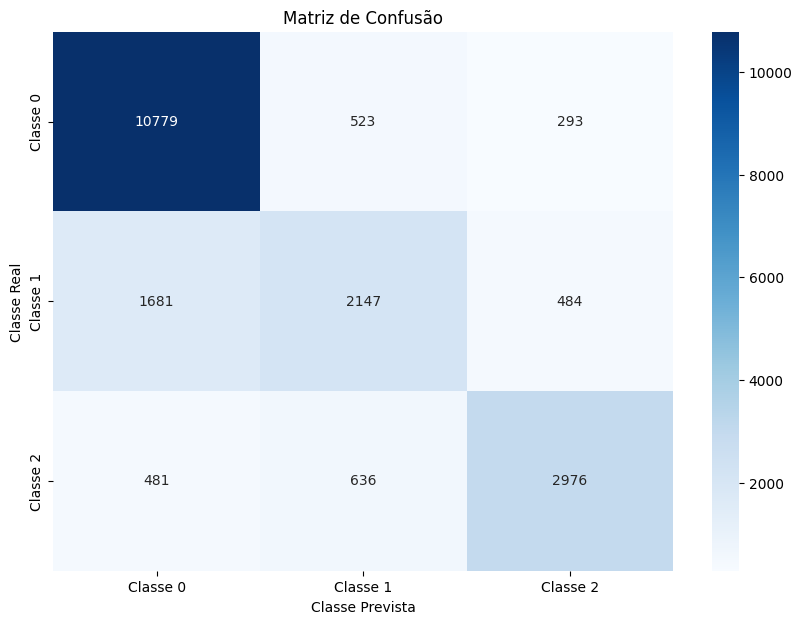

In [67]:
# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe 0', 'Classe 1', 'Classe 2'],  # Ajuste os rótulos conforme necessário
            yticklabels=['Classe 0', 'Classe 1', 'Classe 2'])  # Ajuste os rótulos conforme necessário
plt.title('Matriz de Confusão')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.show()

In [68]:
# Exibir a importância das features
feature_importances = model.get_feature_importance(prettified=True)
print("Feature Importances:\n", feature_importances)

Feature Importances:
                           Feature Id  Importances
0                        qtd_pessoas    15.515482
1                     meses_trabalho    14.445070
2            cod_principal_trab_memb     9.961711
3                              idade     9.341760
4                            uf_ibge     5.506187
5                              idoso     4.729965
6                   dias_atualizacao     4.194499
7                           peso.fam     3.324313
8                 trabalho_principal     3.147441
9               cod_deficiencia_memb     3.032927
10                          infancia     2.799497
11  cod_curso_frequentou_pessoa_memb     2.744925
12           qtd_meses_12_meses_memb     2.471819
13               cod_local_domic_fam     2.437065
14             qtd_comodos_domic_fam     2.296999
15             cod_material_piso_fam     2.259479
16                dias_cadastramento     2.178445
17            trabalho_semana_adulto     1.965740
18          frequenta_escola

# Resumindo o resultado de todos os modelos

In [69]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [70]:
# Modelos treinados e os respectivos conjuntos de teste e predições

models = {'XGBoost with Grid Search': gb_best,
          'RandomForestClassifier': random_forest,
          'DecisionTreeClassifier': decision_tree,
           'CatBoostClassifier': model}
#y_test: Variável de target de teste
predictions = {'XGBoost with Grid Search': y_pred, 'RandomForestClassifier': y_pred, 'DecisionTreeClassifier': y_pred, 'CatBoostClassifier': y_pred}

In [71]:
# Dicionário para armazenar as métricas dos modelos
model_scores = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

In [72]:
# Avaliar cada modelo e armazenar as métricas
for model_name, model in models.items():
    y_pred = model.predict(X_test)

    # Adicionar o nome do modelo e as respectivas métricas
    model_scores['Model'].append(model_name)
    model_scores['Accuracy'].append(accuracy_score(y_test, y_pred))
    model_scores['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    model_scores['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    model_scores['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))


# Criar um DataFrame para organizar os resultados
scores_df = pd.DataFrame(model_scores)

# Mostrar o resumo dos scores
print("Resumo dos Scores dos Modelos:")
print(scores_df)

Resumo dos Scores dos Modelos:
                      Model  Accuracy  Precision  Recall  F1 Score
0  XGBoost with Grid Search    0.7659   0.750263  0.7659  0.748492
1    RandomForestClassifier    0.7692   0.755661  0.7692  0.750759
2    DecisionTreeClassifier    0.7166   0.691369  0.7166  0.691443
3        CatBoostClassifier    0.7951   0.785190  0.7951  0.786158


In [73]:
# Avaliando as features mais importantes para cada modelo

# Dicionário para armazenar as importâncias das features
feature_importances_dict = {}

# Avaliar a importância das features para cada modelo
for model_name, model in models.items():
    print(f"\nAvaliação do modelo: {model_name}")

    if model_name == "CatBoostClassifier":
        # Avaliação de importância usando CatBoost
        feature_importances = model.get_feature_importance(prettified=True)

        # Criar um DataFrame com as importâncias
        importance_df = pd.DataFrame(feature_importances)

        # Renomear colunas para 'Feature' e 'Importance'
        importance_df.columns = ['Feature', 'Importance']
        importance_df['Std'] = None  # Adiciona uma coluna Std como None para manter a estrutura

        # Ordenar pela importância de forma decrescente
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

    else:
        # Avaliar a importância das features usando permutação para outros modelos
        result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

        # Criar um DataFrame com as importâncias
        importance_df = pd.DataFrame({
            'Feature': X_test.columns,
            'Importance': result.importances_mean,
            'Std': result.importances_std
        })

        # Ordenar pela importância de forma decrescente
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Exibir as 5 principais features
    top_features = importance_df.head(5)
    print("\nImportância das Features por Permutação:" if model_name != "CatBoostClassifier" else "\nImportância das Features do CatBoost:")
    for index, row in top_features.iterrows():
        print(f"Feature: {row['Feature']}, Importância: {row['Importance']:.4f}, Desvio Padrão: {row['Std']:.4f}" if row['Std'] is not None else f"Feature: {row['Feature']}, Importância: {row['Importance']:.4f}")

    # Armazenar as importâncias no dicionário
    feature_importances_dict[model_name] = top_features



Avaliação do modelo: XGBoost with Grid Search

Importância das Features por Permutação:
Feature: meses_trabalho, Importância: 0.0424, Desvio Padrão: 0.0014
Feature: qtd_pessoas, Importância: 0.0304, Desvio Padrão: 0.0011
Feature: idade, Importância: 0.0277, Desvio Padrão: 0.0008
Feature: cod_principal_trab_memb, Importância: 0.0241, Desvio Padrão: 0.0010
Feature: idoso, Importância: 0.0192, Desvio Padrão: 0.0009

Avaliação do modelo: RandomForestClassifier

Importância das Features por Permutação:
Feature: idoso, Importância: 0.0522, Desvio Padrão: 0.0005
Feature: meses_trabalho, Importância: 0.0448, Desvio Padrão: 0.0022
Feature: cod_principal_trab_memb, Importância: 0.0369, Desvio Padrão: 0.0012
Feature: qtd_pessoas, Importância: 0.0241, Desvio Padrão: 0.0011
Feature: cod_deficiencia_memb, Importância: 0.0139, Desvio Padrão: 0.0005

Avaliação do modelo: DecisionTreeClassifier

Importância das Features por Permutação:
Feature: idoso, Importância: 0.1643, Desvio Padrão: 0.0012
Feature

# Avaliando o balanceamento das classes

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df_familia_pessoas_final.head()

,cd_ibge,uf_ibge,regiao_ibge,estrato,classf,id_familia,vlr_renda_media_fam,cod_local_domic_fam,cod_especie_domic_fam,qtd_comodos_domic_fam,...,frequenta_escola_nunca_adulto,trabalho_semana_adulto,trabalho_semana_idoso,trabalho_semana_criança,afastado_trabalho,trabalho_principal,trabalho_12meses_adulto,trabalho_12meses_idoso,trabalho_12meses_criança,meses_trabalho
0,4212908,42,4,1,2,268503,60.0,1.0,1.0,5.0,...,1,1,0,0,0,0,1,0,0,12.0
1,2931905,29,2,2,3,2888440,0.0,2.0,1.0,2.0,...,1,0,0,0,0,0,0,0,0,0.0
2,3527207,35,3,2,3,2113517,713.0,1.0,1.0,5.0,...,1,1,0,0,0,1,1,0,0,12.0
3,3303500,33,3,2,2,4419096,50.0,1.0,1.0,3.0,...,1,0,0,0,0,0,0,0,0,0.0
4,2800308,28,2,2,1,4241219,90.0,1.0,1.0,4.0,...,1,0,0,0,0,0,0,0,0,-1.0


In [76]:
# Verificar a distribuição da variável target
target_distribution = df_familia_pessoas_final['classe_renda'].value_counts(normalize=True)

In [77]:
print("Distribuição da variável target 'classe_renda':")
print(target_distribution)

Distribuição da variável target 'classe_renda':
classe_renda
0.0    0.58420
1.0    0.21361
2.0    0.20219
Name: proportion, dtype: float64


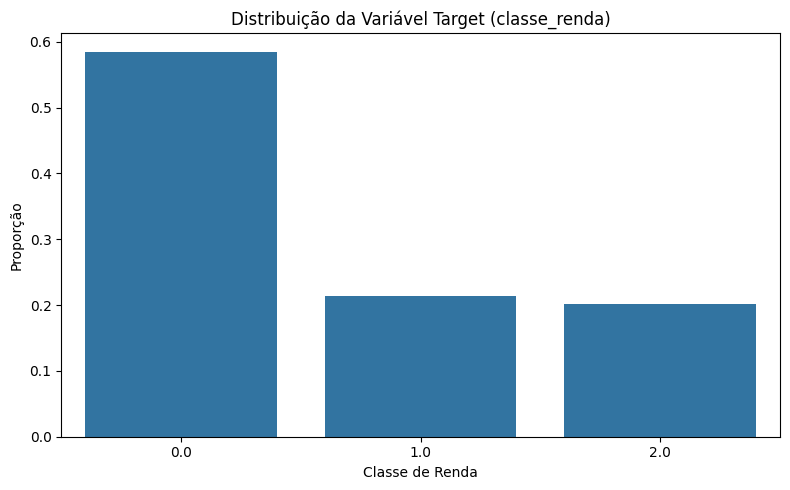

In [78]:
# Plotar a distribuição da variável target
plt.figure(figsize=(8, 5))
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Distribuição da Variável Target (classe_renda)')
plt.xlabel('Classe de Renda')
plt.ylabel('Proporção')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [79]:
# Exibir o número absoluto de ocorrências por classe
absolute_distribution = df_familia_pessoas_final['classe_renda'].value_counts()

print("\nNúmero absoluto de ocorrências por classe:")
print(absolute_distribution)


Número absoluto de ocorrências por classe:
classe_renda
0.0    58420
1.0    21361
2.0    20219
Name: count, dtype: int64


In [80]:
pip install imbalanced-learn


In [81]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# Separar as features (X) e a variável target (y)

X = df_familia_pessoas_final.drop(columns=['classe_renda'])
y = df_familia_pessoas_final['classe_renda']

In [83]:
X.isnull().sum()

,0
cd_ibge,0
uf_ibge,0
regiao_ibge,0
estrato,0
classf,0
...,...
trabalho_principal,0
trabalho_12meses_adulto,0
trabalho_12meses_idoso,0
trabalho_12meses_criança,0


In [84]:
# Primeiro, aplica-se o SMOTE para criar amostras sintéticas das classes minoritárias
# Depois, faz-se undersampling para reduzir a classe majoritária a um tamanho mais equilibrado

# Get the counts of each class in the target variable
class_counts = y.value_counts()

# Define the sampling strategy for SMOTE based on the original class counts
sampling_strategy = {
    1.0: max(35000, class_counts[1.0]),  # Oversample class 1 to at least 35k or its original size
    2.0: max(35000, class_counts[2.0])   # Oversample class 2 to at least 35k or its original size
}

over = SMOTE(sampling_strategy=sampling_strategy)  # Aumenta as classes 1 e 2 para 35k cada or their original sizes if larger
under = RandomUnderSampler(sampling_strategy={0.0: 40000})  # Reduz a classe 0 para 40k

In [85]:
# Criar um pipeline que aplica SMOTE e depois o undersampling
pipeline = Pipeline(steps=[('o', over), ('u', under)])

In [86]:
# Aplicar o balanceamento ao conjunto de dados
X_balanced, y_balanced = pipeline.fit_resample(X, y)

In [87]:
# Verificar a nova distribuição das classes
balanced_distribution = pd.Series(y_balanced).value_counts()

print("Distribuição da variável target 'classe_renda' após o balanceamento:")
print(balanced_distribution)

Distribuição da variável target 'classe_renda' após o balanceamento:
classe_renda
0.0    40000
1.0    35000
2.0    35000
Name: count, dtype: int64


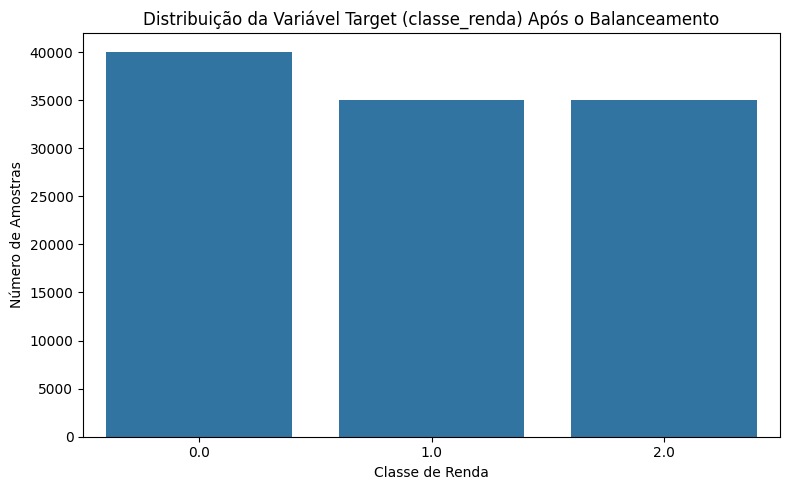

In [88]:
# Visualizar a distribuição das classes após o balanceamento
plt.figure(figsize=(8, 5))
sns.barplot(x=balanced_distribution.index, y=balanced_distribution.values)
plt.title('Distribuição da Variável Target (classe_renda) Após o Balanceamento')
plt.xlabel('Classe de Renda')
plt.ylabel('Número de Amostras')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()